In [96]:
import time 
import requests
import json
import datetime 

def get_stages(app_id):
    print(app_id)
    URL = "http://neu-3-1:18080/api/v1/applications/%s/stages"%(app_id)
    # sending get request and saving the response as response object 
    if URL == "http://neu-3-1:18080/api/v1/applications/app-20200617160405-0036/stages":
        print(URL)
        
    URL="http://neu-3-1:18080/api/v1/applications/app-20200617160405-0036/stages"
        
    r = requests.get(url = URL) 
    #print(r)
    # extracting data in json format 
    stages = r.json() 

    for s in stages:
        submit_time = time.mktime(datetime.datetime.strptime(s['submissionTime'], 
                                                     "%Y-%m-%dT%H:%M:%S.%fGMT").timetuple())        
        start_time = time.mktime(datetime.datetime.strptime(s['firstTaskLaunchedTime'], 
                                                     "%Y-%m-%dT%H:%M:%S.%fGMT").timetuple())
        completion_time = time.mktime(datetime.datetime.strptime(s['completionTime'], 
                                                     "%Y-%m-%dT%H:%M:%S.%fGMT").timetuple())
        #print(s['stageId'], s['inputBytes'], s['outputBytes'], s['rddIds'],
        #      s['numTasks'], completion_time - submit_time)
        
        #print(s.keys())
        #break


# sending get request and saving the response as response object 
URL = "http://neu-3-1:18080/api/v1/applications"
r = requests.get(url = URL) 
applications = r.json() 
        
print(len(applications))
for app in applications:
    if app['id'] == 'app-20200619153707-0673':
        print(app['attempts'][0]['duration'])
        break
    
    
r

683
41820


<Response [200]>

No handles with labels found to put in legend.


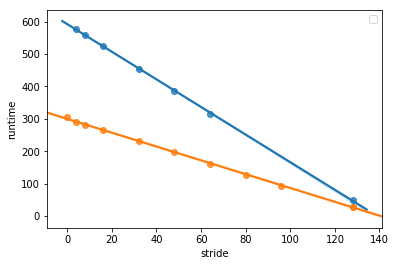

,dataset,bw,stride,runtime,app_runtime
0,32G,1Gbps,128,7.0,0
1,32G,1Gbps,128,28.0,0
2,32G,1Gbps,64,6.0,174356
3,32G,1Gbps,64,162.0,174356
4,32G,1Gbps,128,7.0,42896
5,32G,1Gbps,128,29.0,42896
6,32G,1Gbps,8,8.0,0
7,32G,1Gbps,8,281.0,0
8,32G,1Gbps,16,7.0,0
9,32G,1Gbps,16,264.0,0


In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df = pd.read_csv('/local0/Kariz/expriments/runtime_prediction/micro/results/wordcount-spark.csv')


sns.regplot(x='stride', y='runtime', 
            data=df[(df['bw']=='1Gbps') & (df['dataset']=='64G') & (df['stage_id']==0)])


sns.regplot(x='stride', y='runtime', 
            data=df[(df['bw']=='1Gbps') & (df['dataset']=='32G') & (df['stage_id']==0)])


#sns.regplot(x='stride', y='runtime', 
#            data=df[(df['bw']=='1Gbps') & (df['dataset']=='16G') & (df['stage_id']==0)])

#sns.regplot(x='stride', y='runtime', 
#            data=df[(df['bw']=='1Gbps') & (df['dataset']=='4G') & (df['stage_id']==0)])


plt.legend()
plt.show()



df[['dataset', 'bw', 'stride', 'runtime', 'app_runtime']]

In [63]:
df[df['stage_id'] == 0][['dataset', 'bw', 'stride', 'runtime']]

cache_block_size = 4*1024*1024
one_gig = 1<<30
df['dataset_size'] = df['dataset'].map(lambda x: (int(x.rstrip('G'))<<30))



df2 = df[(df['bw']=='10Gbps') & (df['dataset']=='64G') & (df['stage_id']==0)]

df2 = df[(df['bw']=='10Gbps') & (df['dataset']=='64G') & (df['stage_id']==0)]
df[(df['bw']=='40Gbps') & (df['stage_id']==0)]['dataset'].unique()

In [79]:
path = 's3a://data/HiBench/Wordcount/Input-64G'

path.split('data', 1)[1]

'/HiBench/Wordcount/Input-64G'